<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Make-RBC-Model" data-toc-modified-id="Make-RBC-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Make RBC Model</a></span><ul class="toc-item"><li><span><a href="#Model-Equations" data-toc-modified-id="Model-Equations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Model Equations</a></span></li><li><span><a href="#Find-Steady-State,-Solve-Model" data-toc-modified-id="Find-Steady-State,-Solve-Model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Find Steady State, Solve Model</a></span></li></ul></li><li><span><a href="#Get-US-data" data-toc-modified-id="Get-US-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get US data</a></span><ul class="toc-item"><li><span><a href="#Raw-Data-from-FRED" data-toc-modified-id="Raw-Data-from-FRED-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Raw Data from FRED</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Check-stationarity-after-tranformation" data-toc-modified-id="Check-stationarity-after-tranformation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Check stationarity after tranformation</a></span></li></ul></li><li><span><a href="#Maximum-Likelihood-Estimation" data-toc-modified-id="Maximum-Likelihood-Estimation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Maximum Likelihood Estimation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#MLE-Kalman-Predictions" data-toc-modified-id="MLE-Kalman-Predictions-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>MLE Kalman Predictions</a></span></li><li><span><a href="#MLE-Kalman-Smoother-Output" data-toc-modified-id="MLE-Kalman-Smoother-Output-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>MLE Kalman Smoother Output</a></span></li><li><span><a href="#Impulse-Response-Functions" data-toc-modified-id="Impulse-Response-Functions-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Impulse Response Functions</a></span></li></ul></li></ul></li><li><span><a href="#MAP-Estimation" data-toc-modified-id="MAP-Estimation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MAP Estimation</a></span><ul class="toc-item"><li><span><a href="#Setting-Priors" data-toc-modified-id="Setting-Priors-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Setting Priors</a></span><ul class="toc-item"><li><span><a href="#Observation-Noise-Priors" data-toc-modified-id="Observation-Noise-Priors-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Observation Noise Priors</a></span></li><li><span><a href="#Deep-Parameter-Priors" data-toc-modified-id="Deep-Parameter-Priors-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Deep Parameter Priors</a></span></li></ul></li><li><span><a href="#MAP-Estimation" data-toc-modified-id="MAP-Estimation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>MAP Estimation</a></span><ul class="toc-item"><li><span><a href="#MAP-Kalman-Prediction" data-toc-modified-id="MAP-Kalman-Prediction-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>MAP Kalman Prediction</a></span></li><li><span><a href="#MAP-Kalman-Smoother-Output" data-toc-modified-id="MAP-Kalman-Smoother-Output-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>MAP Kalman Smoother Output</a></span></li></ul></li></ul></li><li><span><a href="#Full-Bayes" data-toc-modified-id="Full-Bayes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Full Bayes</a></span><ul class="toc-item"><li><span><a href="#Estimated-Parameters" data-toc-modified-id="Estimated-Parameters-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Estimated Parameters</a></span><ul class="toc-item"><li><span><a href="#One-Step-Ahead-Predictions" data-toc-modified-id="One-Step-Ahead-Predictions-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>One-Step Ahead Predictions</a></span></li><li><span><a href="#Kalman-Smoother-Output" data-toc-modified-id="Kalman-Smoother-Output-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Kalman Smoother Output</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import sys

sys.path.append("..")

import gEconpy as ge
import gEconpy.plotting as gp
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import arviz as az

config = {
    "figure.figsize": (14, 4),
    "figure.dpi": 144,
    "figure.facecolor": "white",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "axes.spines.top": False,
    "axes.spines.bottom": False,
    "axes.spines.left": False,
    "axes.spines.right": False,
}

plt.rcParams.update(config)

# Make RBC Model

In [2]:
rbc = ge.gEconModel("../GCN Files/RBC_complete.gcn")

Model Building Complete.
Found:
	9 equations
	9 variables
	The following variables were eliminated at user request:
		TC_t,U_t
	The following "variables" were defined as constants and have been substituted away:
		mc_t
	1 stochastic shock
		 1 / 1 have a defined prior. 
	6 parameters
		 4 / 6 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



## Model Equations

In [3]:
for equation in rbc.system_equations:
    display(equation)

-C_t - I_t + K_t-1*r_t + L_t*w_t

I_t - K_t + K_t-1*(1 - delta)

-lambda_t + C_t**(-sigma_C)

-L_t**sigma_L + lambda_t*w_t

beta*(lambda_t+1*r_t+1 - lambda_t+1*(delta - 1)) - lambda_t

A_t*K_t-1**alpha*L_t**(1 - alpha) - Y_t

alpha*A_t*K_t-1**(alpha - 1)*L_t**(1 - alpha) - r_t

A_t*K_t-1**alpha*(1 - alpha)/L_t**alpha - w_t

rho_A*log(A_t-1) + epsilon_A_t - log(A_t)

## Find Steady State, Solve Model 

In [4]:
rbc.steady_state()
rbc.solve_model()

Steady state found! Sum of squared residuals is 1.140814196572275e-28
Solution found, sum of squared residuals:  3.1045537431545617e-31
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


In [5]:
rbc.print_steady_state()

A_ss               1.000
C_ss               2.358
I_ss               0.715
K_ss              35.732
L_ss               0.820
Y_ss               3.073
lambda_ss          0.276
r_ss               0.030
w_ss               2.436


# Get US data

We want series for consumption, investment, labor, GDP, interest rate, and wages

In [6]:
indicators = [
    "NAEXKP01USQ652S",  # GDP
    "USAGFCFQDSMEI",  # Investment
    "USAPFCEQDSMEI",  # HH consumption
    "TOTLQ",  # non-farm hours worked
    "FEDFUNDS",  # real interest rate
    "CES0500000003",  # average hourly wage
]

from pandas_datareader.fred import FredReader
import os

if not os.path.isfile("us_fred_data.csv"):
    data = FredReader(symbols=indicators, start="1900", end=None).read()
    data.to_csv("us_fred_data.csv")
else:
    data = pd.read_csv(
        "us_fred_data.csv",
        index_col=0,
        parse_dates=["DATE"],
    )

## Raw Data from FRED

<Axes: xlabel='DATE'>

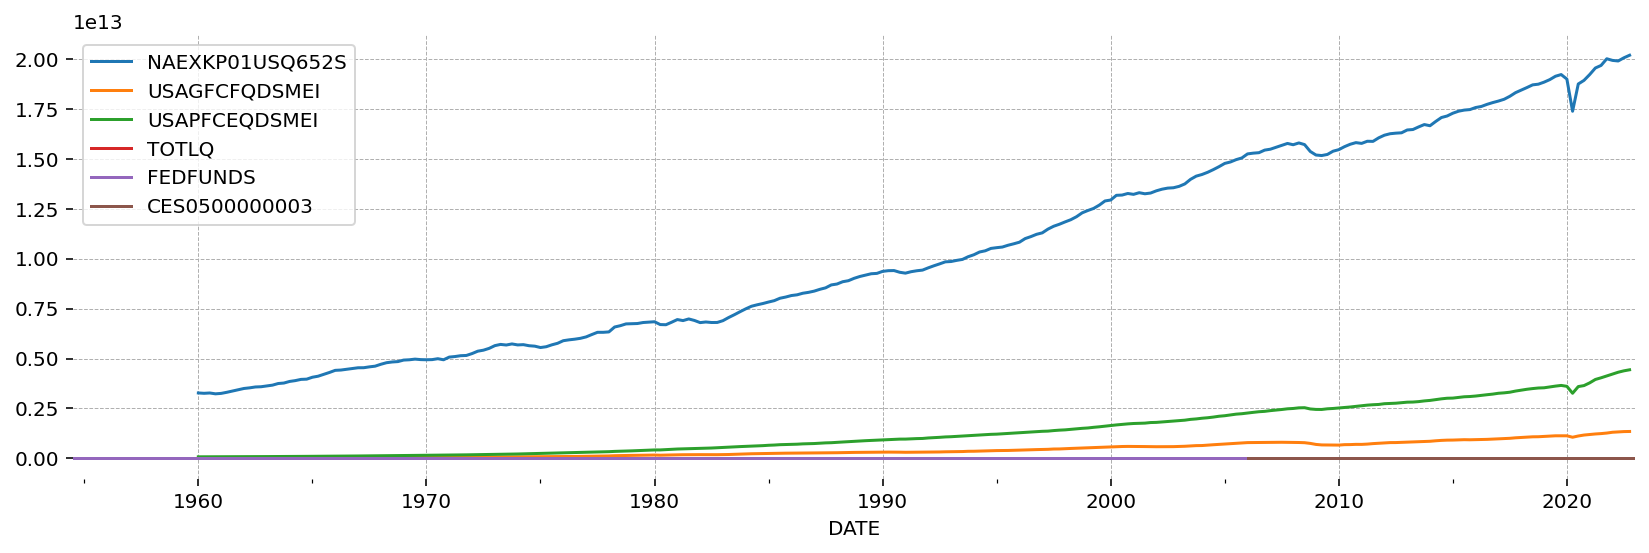

In [7]:
data.resample("QS").last().plot()

In [8]:
df = data.resample("QS").last()
df = df.rename(columns=dict(zip(indicators, ["Y", "I", "C", "L", "r", "w"])))
df.index.name = "Time"

# Regular at least 3 observed series
df.dropna(thresh=3, inplace=True)

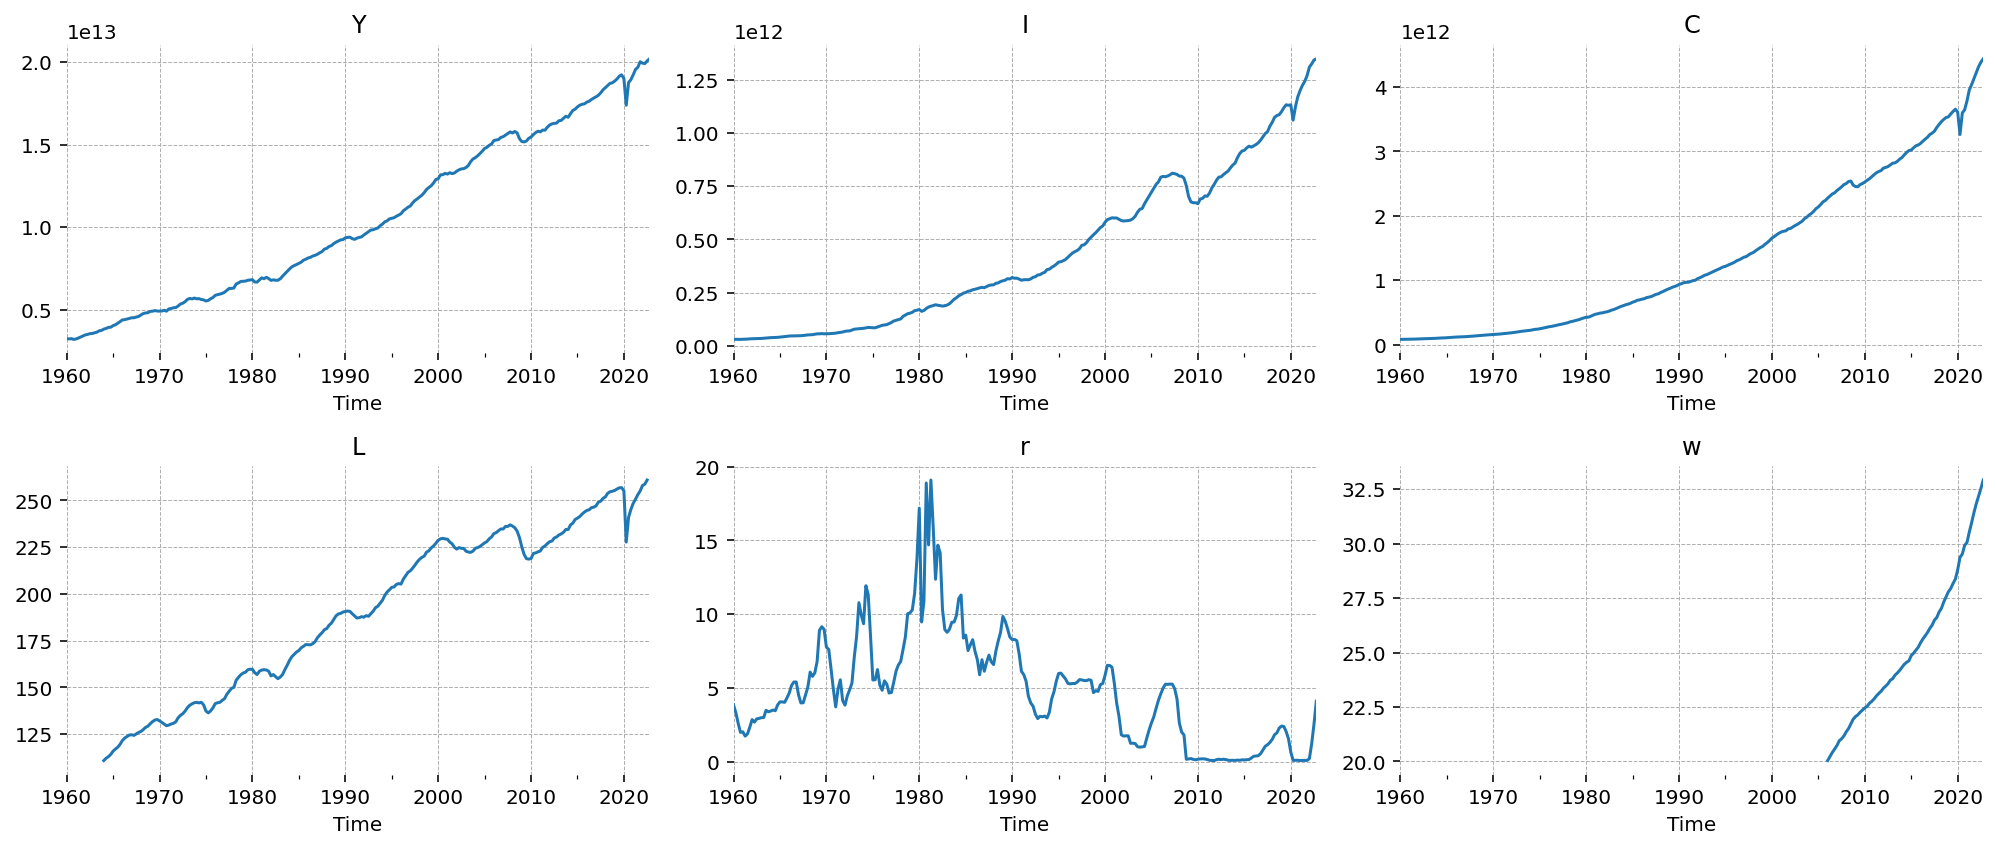

In [9]:
def plot_df(df):
    fig = plt.figure(figsize=(14, 6), dpi=144)
    gs, plot_locs = gp.prepare_gridspec_figure(n_cols=3, n_plots=df.shape[1])

    for loc, var in zip(plot_locs, df):
        axis = fig.add_subplot(gs[loc])
        df[var].plot(ax=axis)
        axis.set_title(var)

    fig.tight_layout()
    plt.show()


plot_df(df)

## Preprocessing

These all need to be logged and de-trended. I'll use an OLS regression to remove the trend. Interest rates are already a percentage, so they don't need to be logged. They do need to be converted to decimal, though.

All the series are seasonally adjusted and in constant chained dollars. Actually I don't know if this is correct. It might be more correct to use raw series. There's no prices in this model so I don't think it matters, but in a full New Keynesian model with a monetary authority it might be correct to use unadjusted data. Need to check that data preparation paper again.

In [10]:
X = np.c_[np.ones(df.shape[0]), np.arange(df.shape[0]), np.arange(df.shape[0]) ** 2]
df_detrend = df.copy().apply(np.log)
df_detrend["r"] = df["r"].mul(1e-2).add(1)

for col in df:
    y = df_detrend[col]
    not_na = y.notna().values
    X_valid = X[not_na, :]
    beta = np.linalg.inv(X_valid.T @ X_valid) @ X_valid.T @ y.dropna()
    trend = X_valid @ beta
    resid = y.dropna() - trend
    df_detrend.loc[not_na, col] = resid

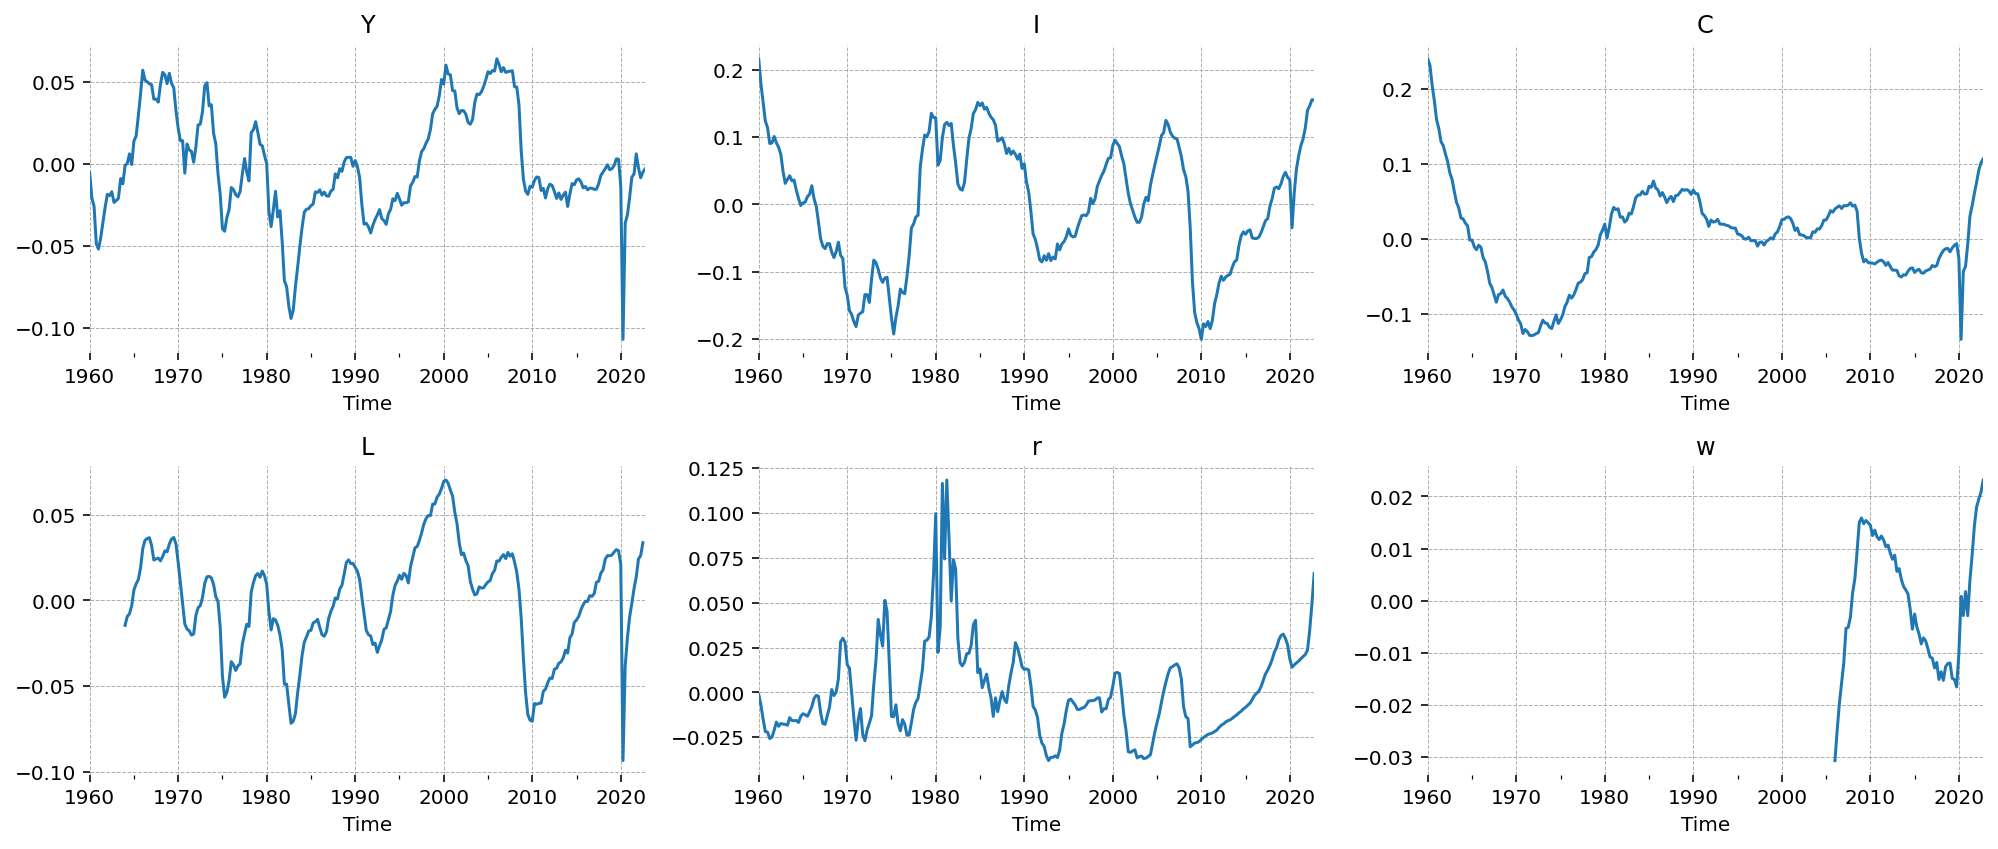

In [11]:
plot_df(df_detrend)

## Check stationarity after tranformation

It's sort of suprising that these are ruled stationarity, I would haved expected that with the big shocks in 2008 and 2020, the ADF test would complain. Could double-check with DFGLS and KPSS, but I think it's good enough for this example.

In [12]:
# ADF_test_summary(df_detrend, missing="drop")

# Maximum Likelihood Estimation

In [13]:
MLEModel = ge.compile_to_statsmodels(rbc)

In [14]:
calibrated_params = {"beta": 0.98, "alpha": 0.35, "sigma_L": 2.0, "delta": 0.05}
rbc.free_param_dict.update(calibrated_params)

To perform maximum likelihood estimation, we will need to help the optimizer along. We will do this by providing bijective transformations between an unconstrained optimizer space and a constrained parameter space. 

For example, suppose we want to sample a variance parameter, which can only be positive. We will allow the sampler to choose any value it likes, then square the choice. We will use the square of the choice to compute the likelihood. Essentially, we perform strategic change-of-variables to make our lives easier.

Statsmodels can handle all the math for us, we just need to provide a dictonary of transformations. We will use two: `PositiveTransformer`, which constrains parameters to be positive, and `IntervalTransformer`, which constrains parameters to be within a set boundary.

In addition, since we want to show the model 6 time series, but we only have one stochastic shock in our model, we will need to add at least 5 measurement noises. We can do this by specificy values for `noise_start_dict`. Any data without a starting value will be assumed to be perfectly measured.

In [15]:
from gEconpy.classes.transformers import PositiveTransformer, IntervalTransformer

param_start_dict = {
    "sigma_C": 1.5,
    "sigma_L": 2.0,
    "rho_A": 0.85,
}

shock_start_dict = {"epsilon_A": 0.5}

noise_start_dict = {
    "C": 0.02,
    "L": 0.05,
    "I": 0.02,
    "r": 0.03,
    "w": 0.1,
}

# The slope parameter controls the steepness of the gradient around 0 (lower slope = more gentle gradient)
param_transforms = {
    "sigma_C": IntervalTransformer(low=1.05, high=10.0, slope=1),
    "sigma_L": IntervalTransformer(low=1.05, high=10.0, slope=1),
    "rho_A": IntervalTransformer(low=1e-4, high=0.99, slope=1),
    #     'alpha':IntervalTransformer(low=0.1, high=0.80, slope=1)
}

mle_mod = MLEModel(
    df_detrend,
    param_start_dict=param_start_dict,
    shock_start_dict=shock_start_dict,
    noise_start_dict=noise_start_dict,
    param_transforms=param_transforms,
    shock_transforms=None,  # If None, will automatically transform to positive values only
    noise_transforms=None,  # If None, will automatically transform to positive values only
    initialization="stationary",
)

In [16]:
mle_res = mle_mod.fit(method="nm", maxiter=10_000)
mle_res = mle_mod.fit(method="lbfgs", maxiter=1_000, start_params=mle_res.params)

Optimization terminated successfully.
         Current function value: -8.952182
         Iterations: 1278
         Function evaluations: 1974


In [17]:
mle_res.summary()

C:\Users\Jesse\miniconda3\envs\gEconpy\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:     ['Y', 'I', 'C', 'L', 'r', 'w']   No. Observations:                  252
Model:                                  DSGEModel   Log Likelihood                 815.930
Date:                            Tue, 25 Apr 2023   AIC                          -1613.860
Time:                                    01:06:12   BIC                          -1582.095
Sample:                                01-01-1960   HQIC                         -1601.078
                                     - 10-01-2022                                         
Covariance Type:                              opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma_C              1.0500      6.016      0.175      0.861     -10.741      12.841
sigma_L             10.0000    542.777      0.018      0.985   -1053.823    1073.823
rho_A                0.9900      0.045     21.869      0.000       0.901       1.079
sigma2.epsilon_A     0.0117      0.041      0.284      0.776      -0.069       0.093
sigma2.C             0.1273      0.344      0.370      0.711      -0.547       0.801
sigma2.L             0.0693      0.125      0.553      0.580      -0.176       0.315
sigma2.I             0.0330      0.021      1.569      0.117      -0.008       0.074
sigma2.r             0.0448      0.116      0.387      0.699      -0.182       0.272
sigma2.w             0.0385      0.012      3.142      0.002       0.014       0.062
======================================================================================================================================
Ljung-Box (L1) (Q):     0.23, 239.45, 237.23, 225.88, 207.77, 171.65   Jarque-Bera (JB):   8519.22, 7.87, 11.26, 3.59, 229.93, 1842.96
Prob(Q):                          0.63, 0.00, 0.00, 0.00, 0.00, 0.00   Prob(JB):                    0.00, 0.02, 0.00, 0.17, 0.00, 0.00
Heteroskedasticity (H):            2.02, 0.36, 0.09, 2.12, 0.41, inf   Skew:                     -1.43, 0.33, 0.36, -0.29, 1.59, -1.44
Prob(H) (two-sided):              0.00, 0.00, 0.00, 0.00, 0.00, 0.00   Kurtosis:                  31.34, 2.44, 3.74, 3.02, 6.42, 15.93
======================================================================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (centered finite differences).
"""

In [18]:
def plot_sm_results(res, filter_output="predicted"):
    fig = plt.figure(figsize=(14, 8))

    endog_vars = res.data.ynames
    states = mle_res.states.predicted.columns

    gs, plot_locs = gp.prepare_gridspec_figure(n_cols=3, n_plots=len(states))

    for i, (name, loc) in enumerate(zip(states, plot_locs)):
        axis = fig.add_subplot(gs[loc])

        mu = getattr(res.states, filter_output)[name]
        sigma = getattr(res.states, filter_output + "_cov").loc[name, name]

        upper = mu + 1.98 * np.sqrt(sigma + 1e-8)
        lower = mu - 1.98 * np.sqrt(sigma + 1e-8)

        start_idx = 1 if filter_output == "predicted" else 0
        axis.plot(mle_res.data.dates, mu.values[start_idx:], label="Predicted")
        axis.fill_between(
            mle_res.data.dates,
            lower.values[start_idx:],
            upper.values[start_idx:],
            color="tab:blue",
            alpha=0.25,
        )

        if name in endog_vars:
            mle_res.data.orig_endog[name].plot(label="Data", ax=axis)

        axis.set(title=name)
    fig.tight_layout()
    title_text = (
        "One-Step Ahead" if filter_output == "predicted" else filter_output.title()
    )
    fig.suptitle(f"Kalman {title_text} Predictions", y=1.05)
    fig.axes[1].legend(
        bbox_to_anchor=(0.5, 0.98),
        loc="lower center",
        bbox_transform=fig.transFigure,
        ncols=2,
    )

    plt.show()

### MLE Kalman Predictions

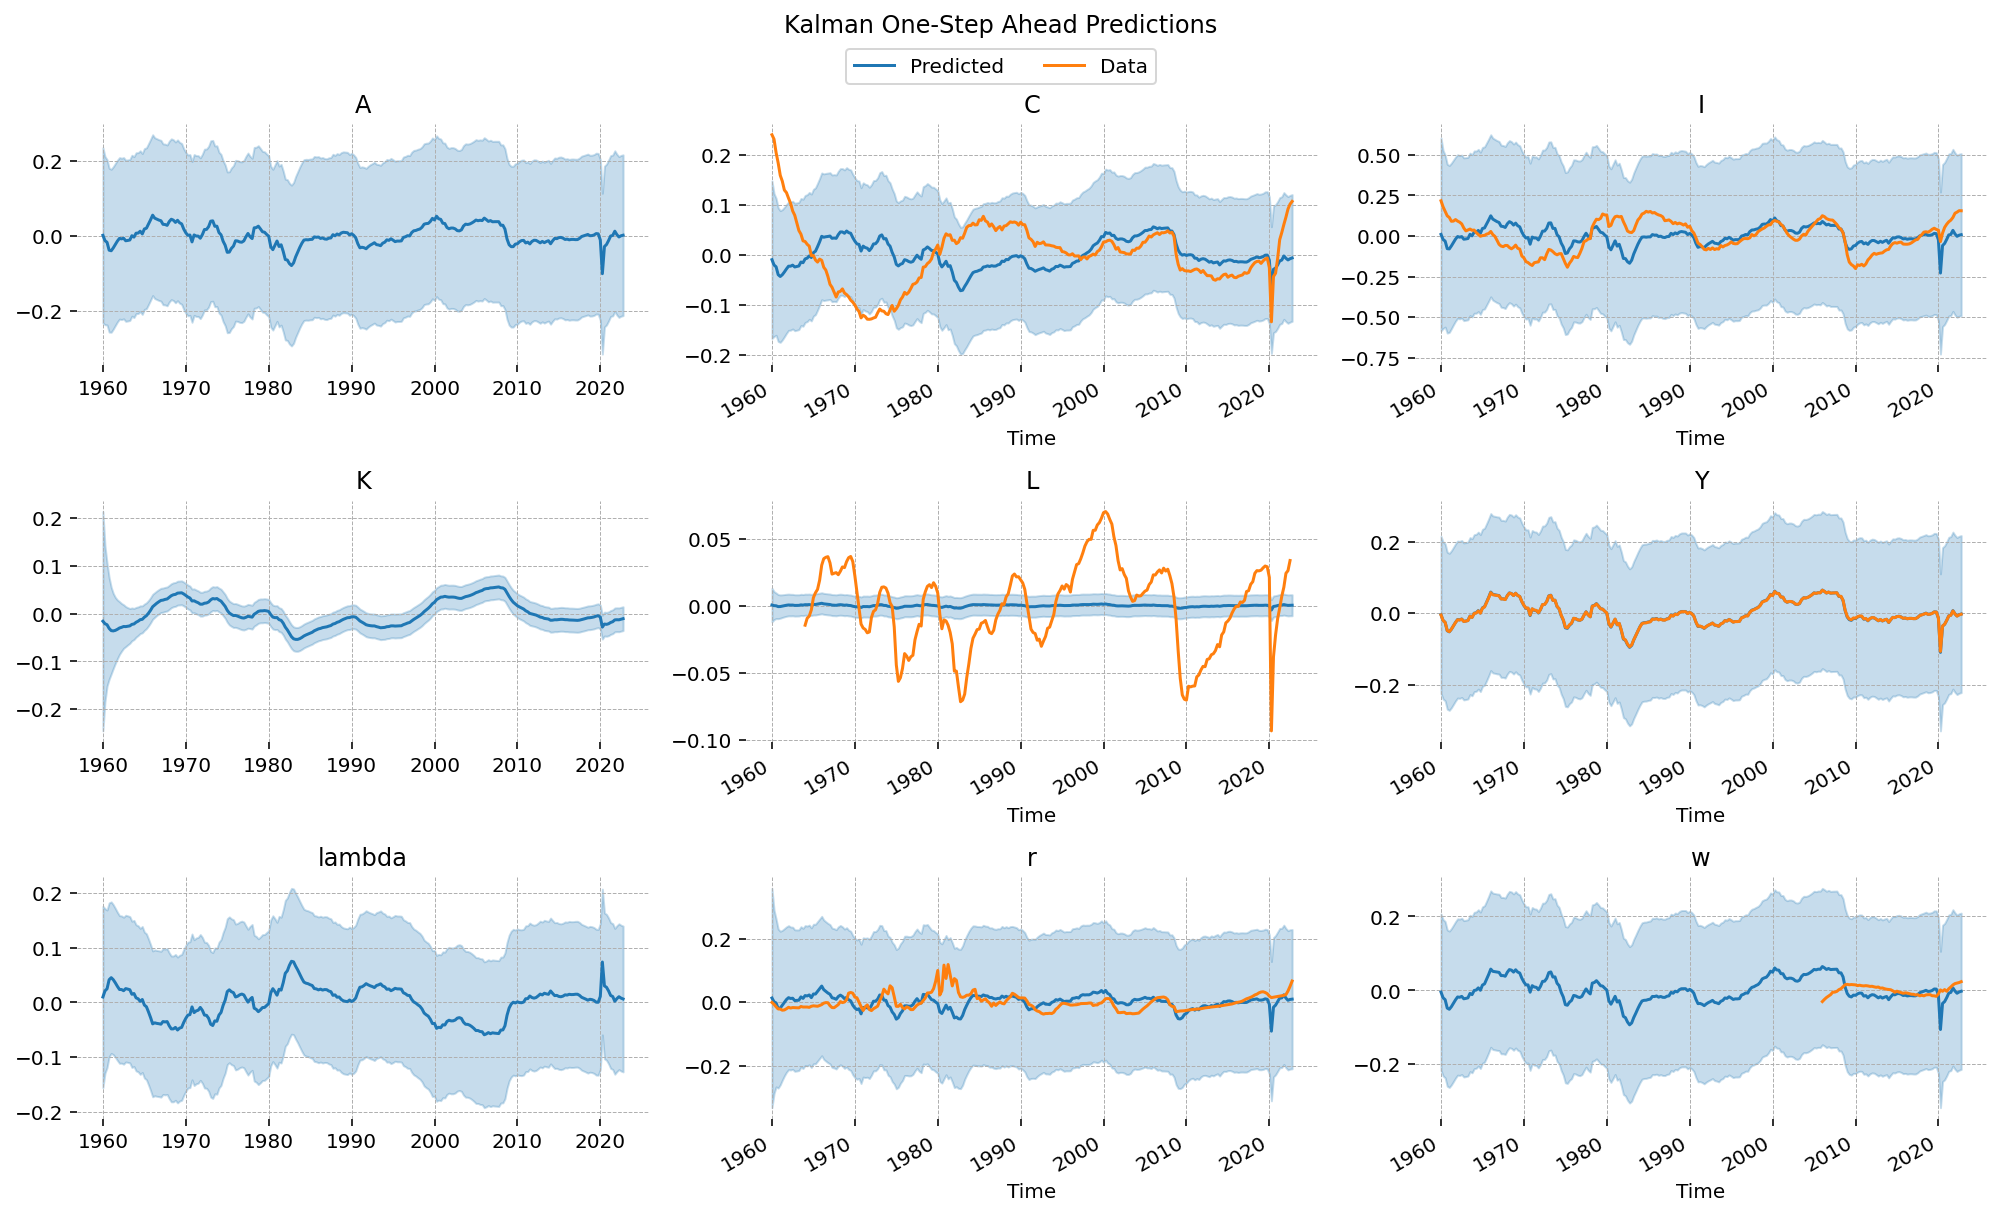

In [19]:
plot_sm_results(mle_res)

### MLE Kalman Smoother Output

The Kalman smoother takes into account both future and past information. In principle, it extracts the best possible signal from noisy data

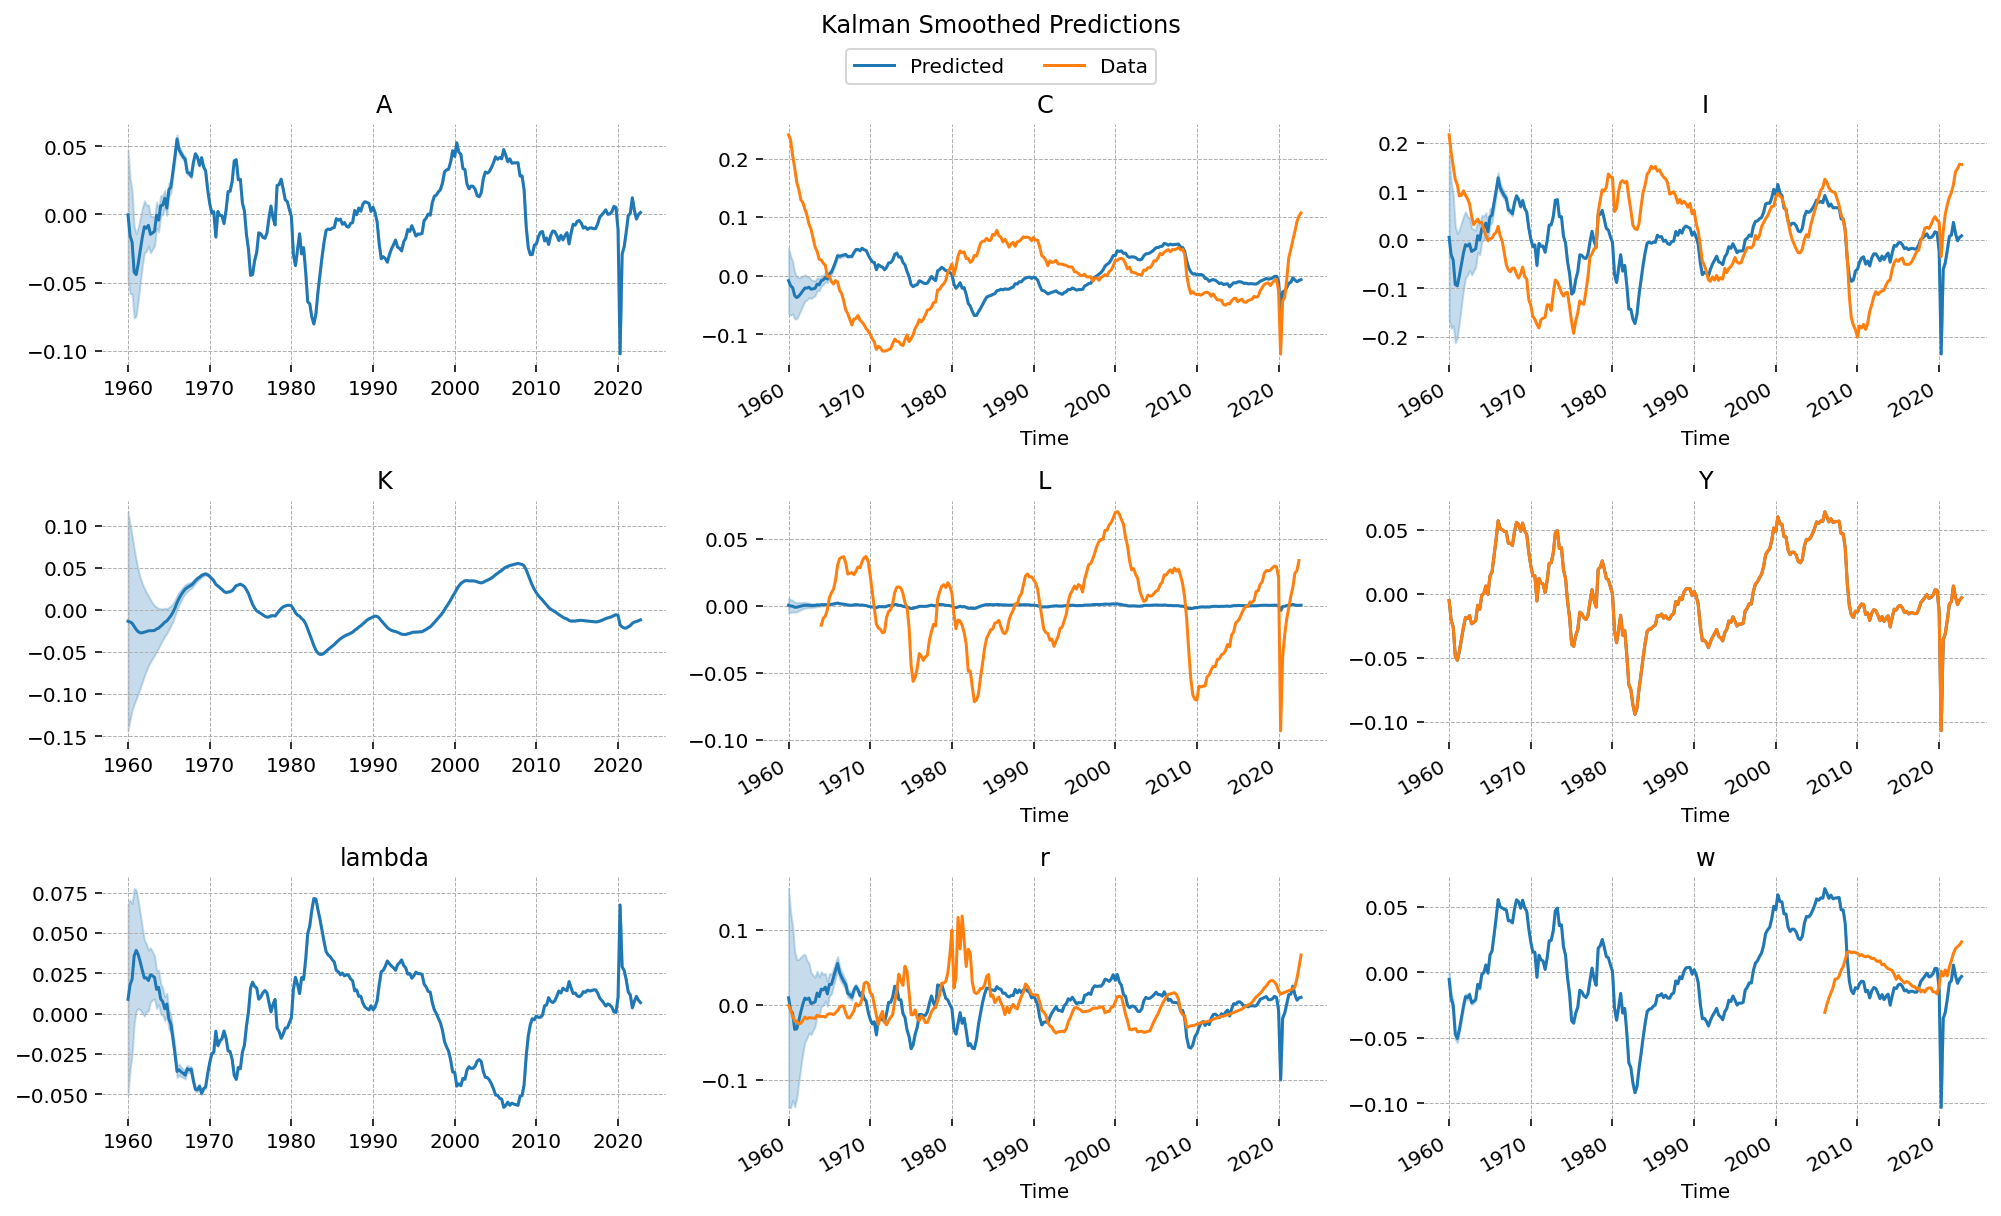

In [20]:
plot_sm_results(mle_res, "smoothed")

### Impulse Response Functions

In [21]:
irf_df = mle_res.impulse_responses(impulse=0, steps=40, orthogonalized=False)
irf_df.index = pd.MultiIndex.from_product(
    [irf_df.index, ["epsilon_A"]], names=["Time", "Shocks"]
)
irf_df.columns.name = "Variables"

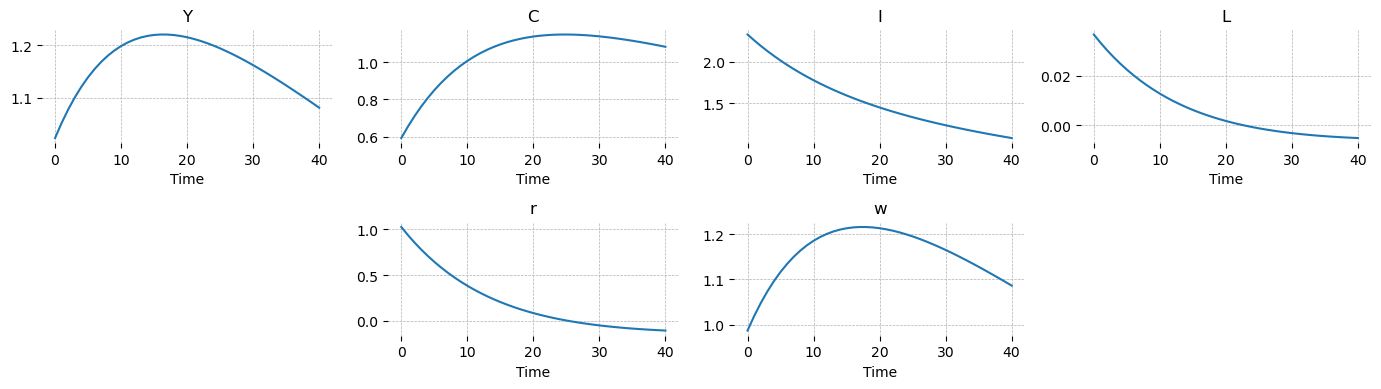

In [22]:
fig = gp.plot_irf(
    irf_df.T,
    shocks_to_plot=["epsilon_A"],
    vars_to_plot=["Y", "C", "I", "L", "r", "w"],
    figsize=(14, 4),
)
plt.show()

# MAP Estimation

An alternative to maximum likelihood estimation is Maximum Aposterioi estimation, or MAP. MAP assigns priors to all the parameters in the model, and maximizes the posterior distribution given by Bayes' Law:

$$\text{Posterior} = \frac{\text{Likelihood}\cdot\text{Prior}}{\text{Evidence}}$$

The "evidence" is just a constant, so we can ignore it for maximization. Taking logs, we get:

$$\max_\theta \log\text{Posterior} = \log \text{Likelihood} + \log \text{Prior}$$

If the log Prior term is zero, this is exactly maximum likelihood estimation, which chooses parameters $\theta$ to maximize the log likelihood. So we're doing a regularized maximum likelihood, based on knowledge we have about what the parameter values are likely to be. 

As an additional benefit, we will no longer need to use transformations. If the optimizer tries to choose a value outside of the support of the prior, the log prior term will be negative infinity.

## Setting Priors

### Observation Noise Priors

In [23]:
from scipy import stats

# Define priors for the observation noise

rbc.observation_noise_priors.update(
    {
        "Y": stats.gamma(2, scale=1 / 20),  # Trust Y more
        "C": stats.gamma(2, scale=1 / 10),
        "L": stats.gamma(2, scale=1 / 8),  # Trust L less
        "I": stats.gamma(2, scale=1 / 10),
        "r": stats.gamma(2, scale=1 / 10),
        "w": stats.gamma(2, scale=1 / 10),  # Trust w even less
    }
)

Note the differences in the x-axis!

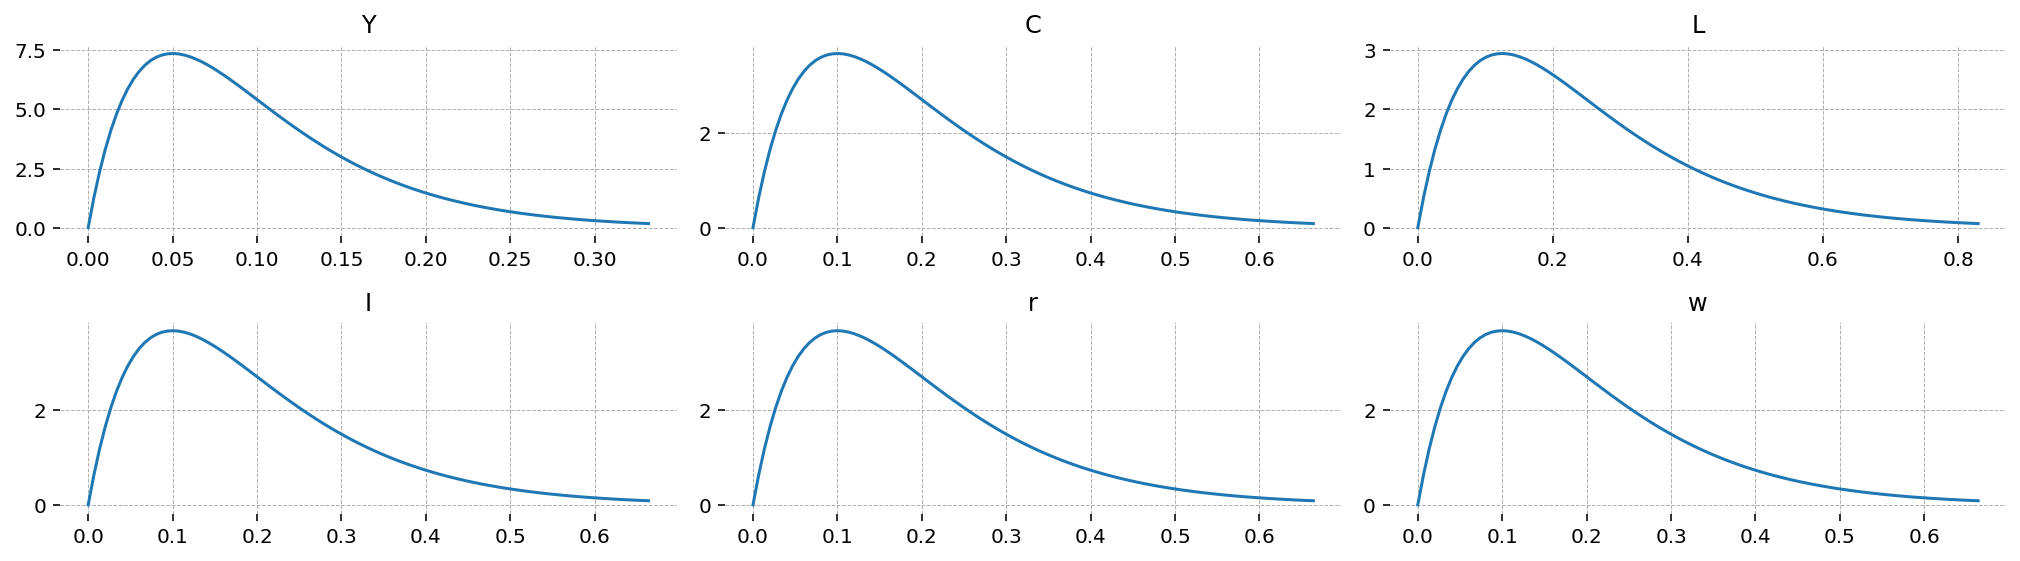

In [24]:
fig = plt.figure()
gs, plot_locs = gp.prepare_gridspec_figure(n_cols=3, n_plots=6)

for (name, d), loc in zip(rbc.observation_noise_priors.items(), plot_locs):
    x_grid = np.linspace(0, d.isf(0.01), 100)
    axis = fig.add_subplot(gs[loc])
    axis.plot(x_grid, d.pdf(x_grid))
    axis.set_title(name)
fig.tight_layout()
plt.show()

### Deep Parameter Priors
Priors for the other parameters were already defined in the GCN file

In [25]:
loc = 3
scale = 1
rbc.param_priors["sigma_C"] = stats.truncnorm(
    a=(1 - loc) / scale, b=np.inf, loc=loc, scale=scale
)
rbc.param_priors["sigma_L"] = stats.truncnorm(
    a=(1 - loc) / scale, b=np.inf, loc=loc, scale=scale
)

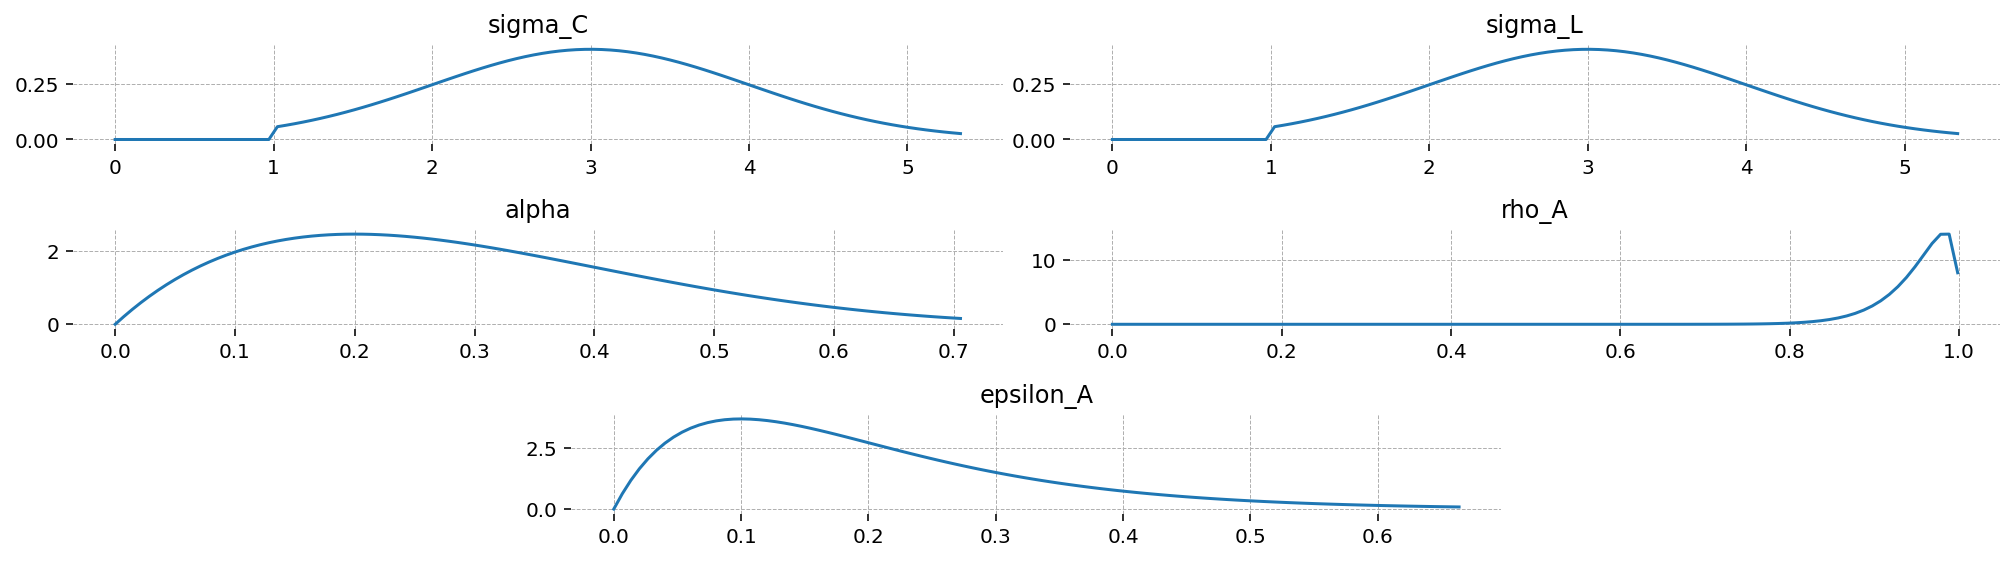

In [26]:
fig = plt.figure()
gs, plot_locs = gp.prepare_gridspec_figure(n_cols=2, n_plots=5)

all_priors = rbc.param_priors.copy()
all_priors.update(
    {"epsilon_A": v for k, v in rbc.shock_priors["epsilon_A"].rv_params.items()}
)

for (name, d), loc in zip(all_priors.items(), plot_locs):
    x_grid = np.linspace(0, d.isf(0.01), 100)
    axis = fig.add_subplot(gs[loc])
    axis.plot(x_grid, d.pdf(x_grid))
    axis.set_title(name)
fig.tight_layout()
plt.show()

## MAP Estimation

In [27]:
map_mod = MLEModel(
    df_detrend,
    param_start_dict=param_start_dict,
    shock_start_dict=shock_start_dict,
    noise_start_dict=noise_start_dict,
    param_transforms={},  # An empty transform dict will default to no transform for everything
    shock_transforms={},
    noise_transforms={},
    fit_MAP=True,
    initialization="stationary",
)

Parameter sigma_C was not assigned a transformation, assigning IdentityTransform
Parameter sigma_L was not assigned a transformation, assigning IdentityTransform
Parameter rho_A was not assigned a transformation, assigning IdentityTransform
Shock epsilon_A was not assigned a transformation, assigning IdentityTransform
Noise for state C was not assigned a transformation, assigning IdentityTransform
Noise for state L was not assigned a transformation, assigning IdentityTransform
Noise for state I was not assigned a transformation, assigning IdentityTransform
Noise for state r was not assigned a transformation, assigning IdentityTransform
Noise for state w was not assigned a transformation, assigning IdentityTransform


In [28]:
map_res = map_mod.fit(method="nm", maxiter=10_000)
map_res = map_mod.fit(method="lbfgs", start_params=map_res.params, maxiter=1_000)

Optimization terminated successfully.
         Current function value: -4.967585
         Iterations: 1567
         Function evaluations: 2344


In [29]:
map_res.summary()

C:\Users\Jesse\miniconda3\envs\gEconpy\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:     ['Y', 'I', 'C', 'L', 'r', 'w']   No. Observations:                  252
Model:                                  DSGEModel   Log Likelihood                1258.105
Date:                            Tue, 25 Apr 2023   AIC                          -2498.209
Time:                                    01:06:50   BIC                          -2466.444
Sample:                                01-01-1960   HQIC                         -2485.428
                                     - 10-01-2022                                         
Covariance Type:                              opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma_C              1.0000   9.61e-11   1.04e+10      0.000       1.000       1.000
sigma_L              1.8607   9.71e-09   1.92e+08      0.000       1.861       1.861
rho_A                0.9907   4.85e-06   2.04e+05      0.000       0.991       0.991
sigma2.epsilon_A     0.3846   9.67e-08   3.98e+06      0.000       0.385       0.385
sigma2.C             0.0436   7.83e-06   5572.728      0.000       0.044       0.044
sigma2.L             0.0057      0.000     12.543      0.000       0.005       0.007
sigma2.I             0.0008   8.75e-05      9.695      0.000       0.001       0.001
sigma2.r             0.0012   6.57e-05     18.057      0.000       0.001       0.001
sigma2.w             0.2987   6.89e-07   4.34e+05      0.000       0.299       0.299
=====================================================================================================================================
Ljung-Box (L1) (Q):     0.21, 237.11, 239.40, 227.73, 204.63, 177.60   Jarque-Bera (JB):   8533.26, 8.62, 4.24, 2.56, 228.28, 1827.72
Prob(Q):                          0.65, 0.00, 0.00, 0.00, 0.00, 0.00   Prob(JB):                   0.00, 0.01, 0.12, 0.28, 0.00, 0.00
Heteroskedasticity (H):            2.02, 0.34, 0.10, 2.20, 0.43, inf   Skew:                    -1.46, 0.40, 0.25, -0.24, 1.59, -1.81
Prob(H) (two-sided):              0.00, 0.00, 0.00, 0.00, 0.00, 0.00   Kurtosis:                 31.36, 2.59, 3.40, 2.91, 6.42, 15.69
=====================================================================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (centered finite differences).
[2] Covariance matrix is singular or near-singular, with condition number 6.82e+22. Standard errors may be unstable.
"""

### MAP Kalman Prediction

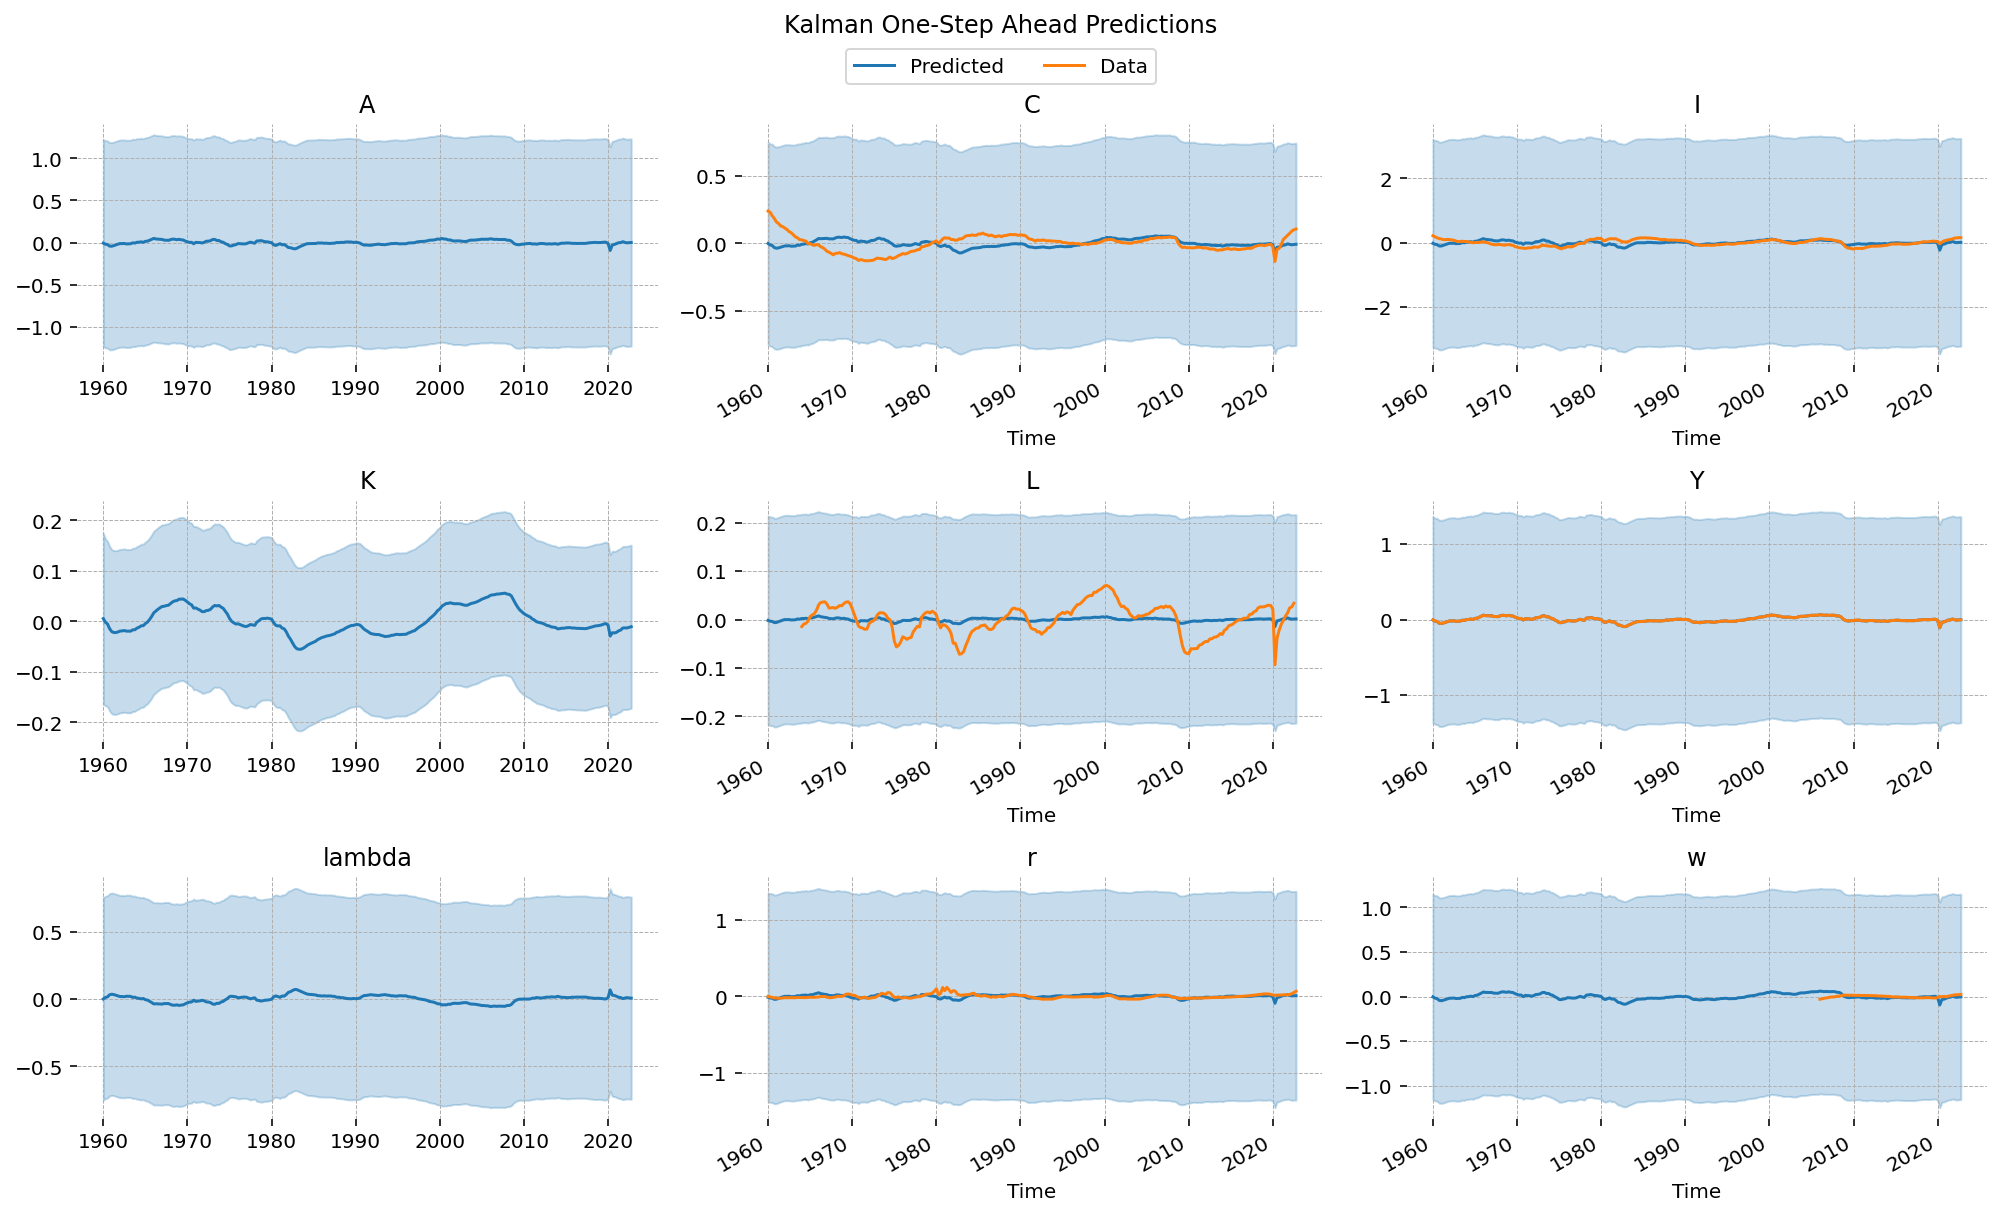

In [30]:
plot_sm_results(map_res)

### MAP Kalman Smoother Output

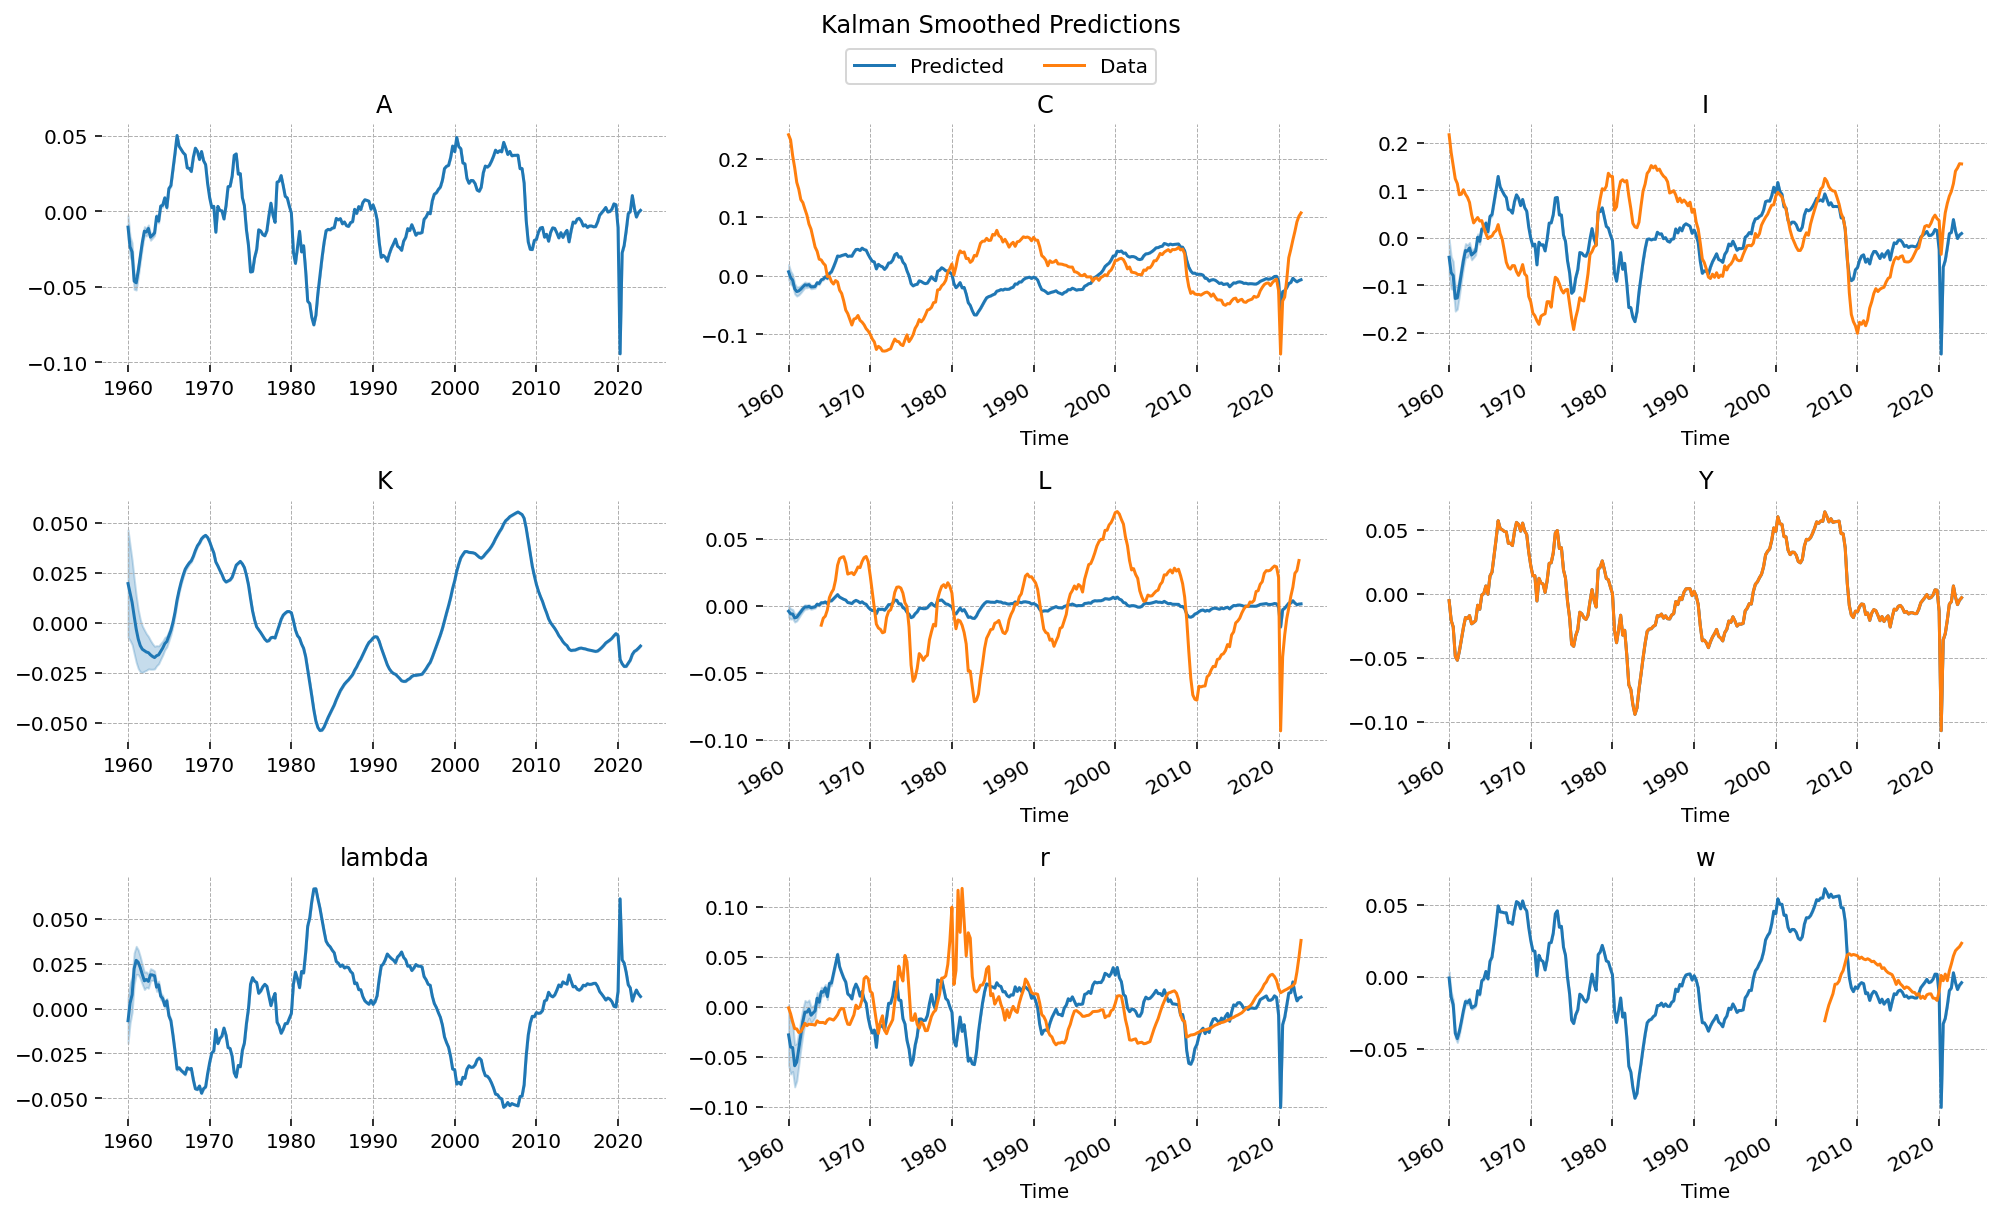

In [31]:
plot_sm_results(map_res, "smoothed")

# Full Bayes

MAP looks too confident, and MLE looks totally untrustworthy. The next option is to go full Bayes. Instead of maximizing the posterior, we will compute the whole thing. Unfortunately, that's impossible. Fortunately, we don't need to. We can obtain the posterior via Monte Carlo Markov Chain (MCMC) sampling.

In [32]:
idata = rbc.fit(
    df_detrend, n_walkers=50, draws=10_000, burn_in=2500, return_inferencedata=True
)

100%|████████████████████████████████████████████████████████████████████████████| 12500/12500 [50:53<00:00,  4.09it/s]


## Estimated Parameters

In [33]:
az.summary(idata)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk   
sigma_C    1.050  0.043   1.000    1.127      0.001    0.001    3963.0  \
sigma_L    3.334  0.787   1.918    4.883      0.013    0.009    3782.0   
alpha      0.173  0.015   0.144    0.202      0.000    0.000    4334.0   
rho_A      0.974  0.004   0.966    0.981      0.000    0.000    4076.0   
epsilon_A  0.000  0.000   0.000    0.000      0.000    0.000    6878.0   
Y          0.003  0.000   0.003    0.004      0.000    0.000    4020.0   
C          0.001  0.000   0.001    0.002      0.000    0.000    4027.0   
L          0.001  0.000   0.001    0.001      0.000    0.000    3898.0   
I          0.000  0.000   0.000    0.000      0.000    0.000    4345.0   
r          0.001  0.000   0.000    0.001      0.000    0.000    3890.0   
w          0.002  0.000   0.002    0.003      0.000    0.000    4059.0   

           ess_tail  r_hat  
sigma_C      5821.0   1.01  
sigma_L      8081.0   1.01  
alpha        7615.0   1.01  
rho_A        7415.0   1.01  
epsilon_A   14701.0   1.01  
Y            7282.0   1.01  
C            8242.0   1.01  
L            8096.0   1.01  
I            7600.0   1.01  
r            8006.0   1.01  
w            6412.0   1.01

In [34]:
deep_params = ["sigma_C", "sigma_L", "alpha", "rho_A", "epsilon_A"]

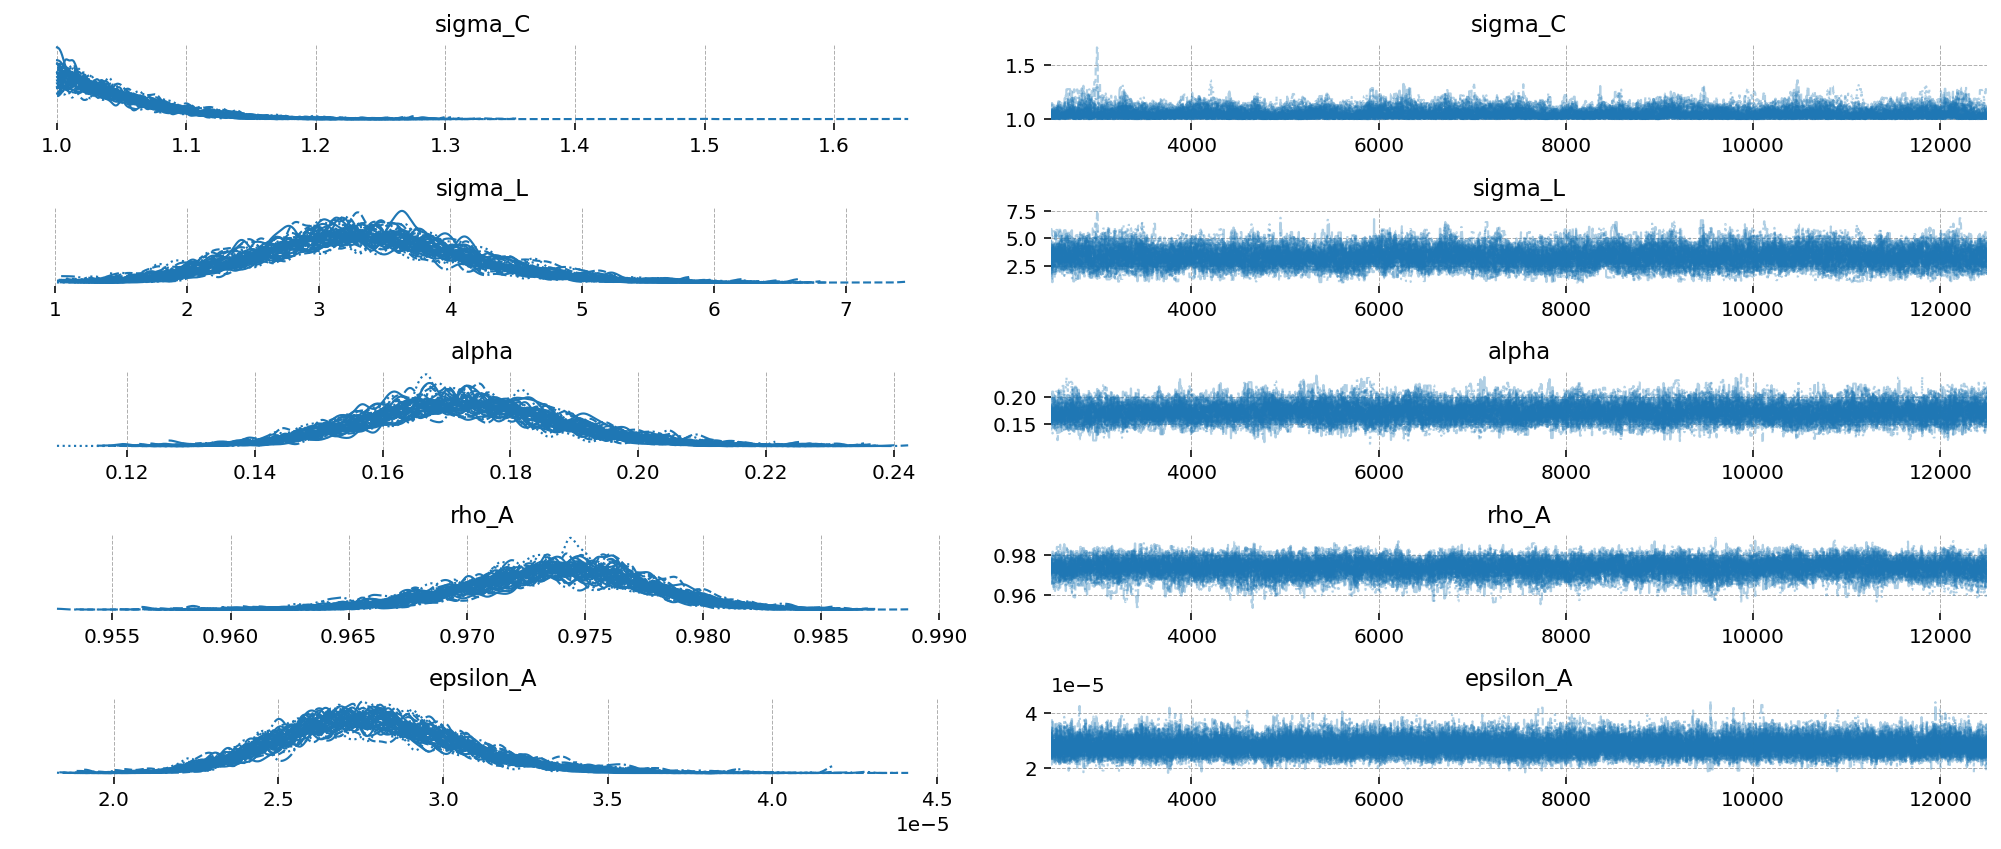

In [35]:
fig, ax = plt.subplots(len(deep_params), 2, figsize=(14, 6))
az.plot_trace(idata, axes=ax, var_names=deep_params)
fig.tight_layout()
plt.show()

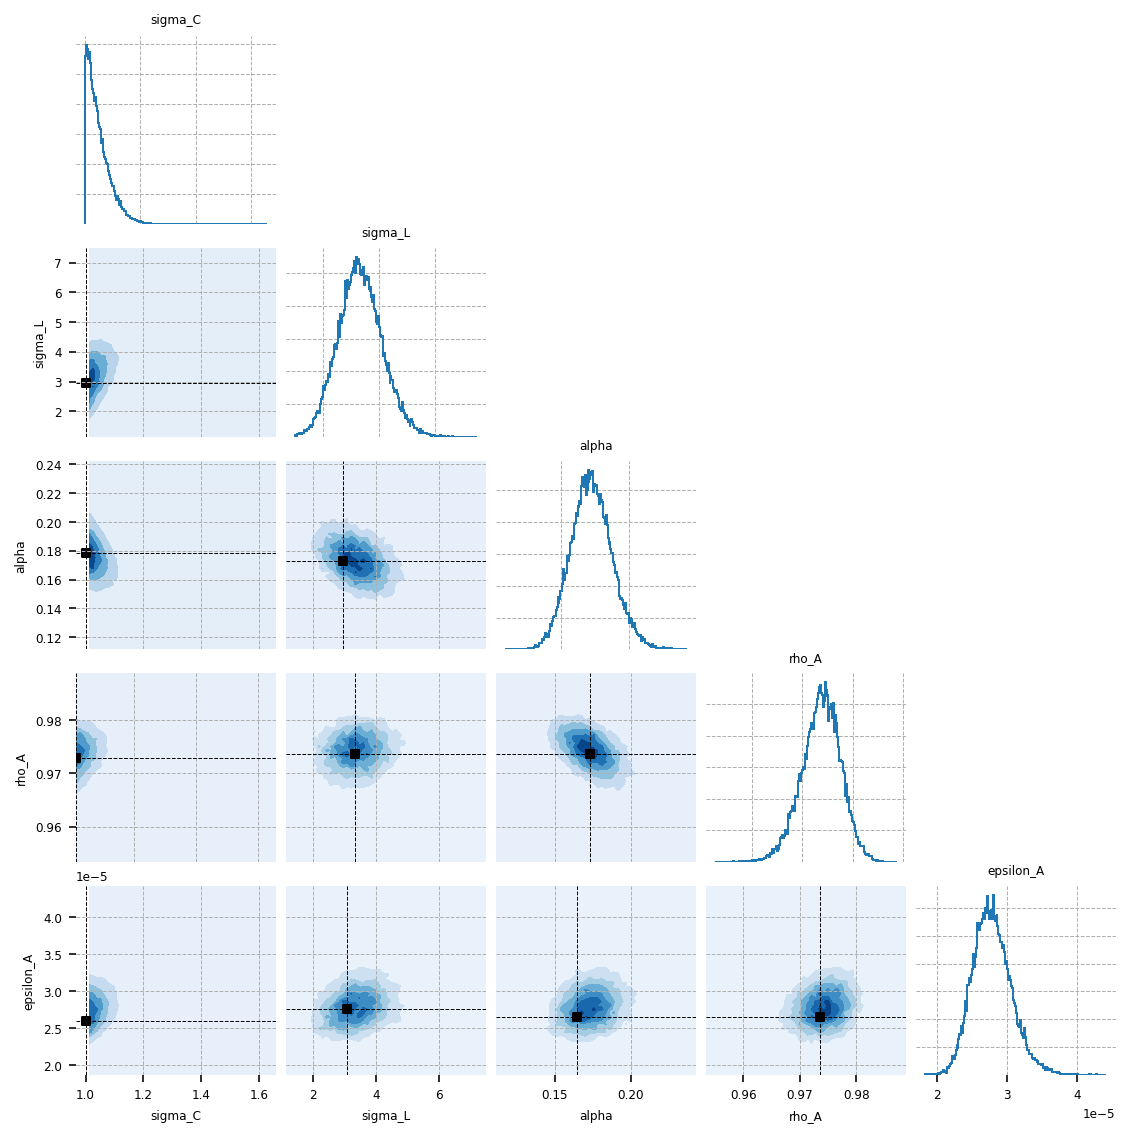

In [36]:
gp.plot_corner(
    idata,
    var_names=deep_params,
    show_marginal_modes=True,
    figsize=(8, 8),
    dpi=144,
    fontsize=6,
);

In [37]:
posterior = az.extract_dataset(idata, "posterior")

C:\Users\Jesse\AppData\Local\Temp\ipykernel_15160\3135618317.py:1: FutureWarning: extract_dataset has been deprecated, please use extract
  posterior = az.extract_dataset(idata, "posterior")


In [38]:
conditional_posterior = ge.sampling.kalman_filter_from_posterior(
    rbc, df_detrend, posterior, n_samples=10_000
)

Sampling 10000 / 10000 [==================================================] elapsed: 03:06, remaining: 00:00, 53.49iter/secer


### One-Step Ahead Predictions

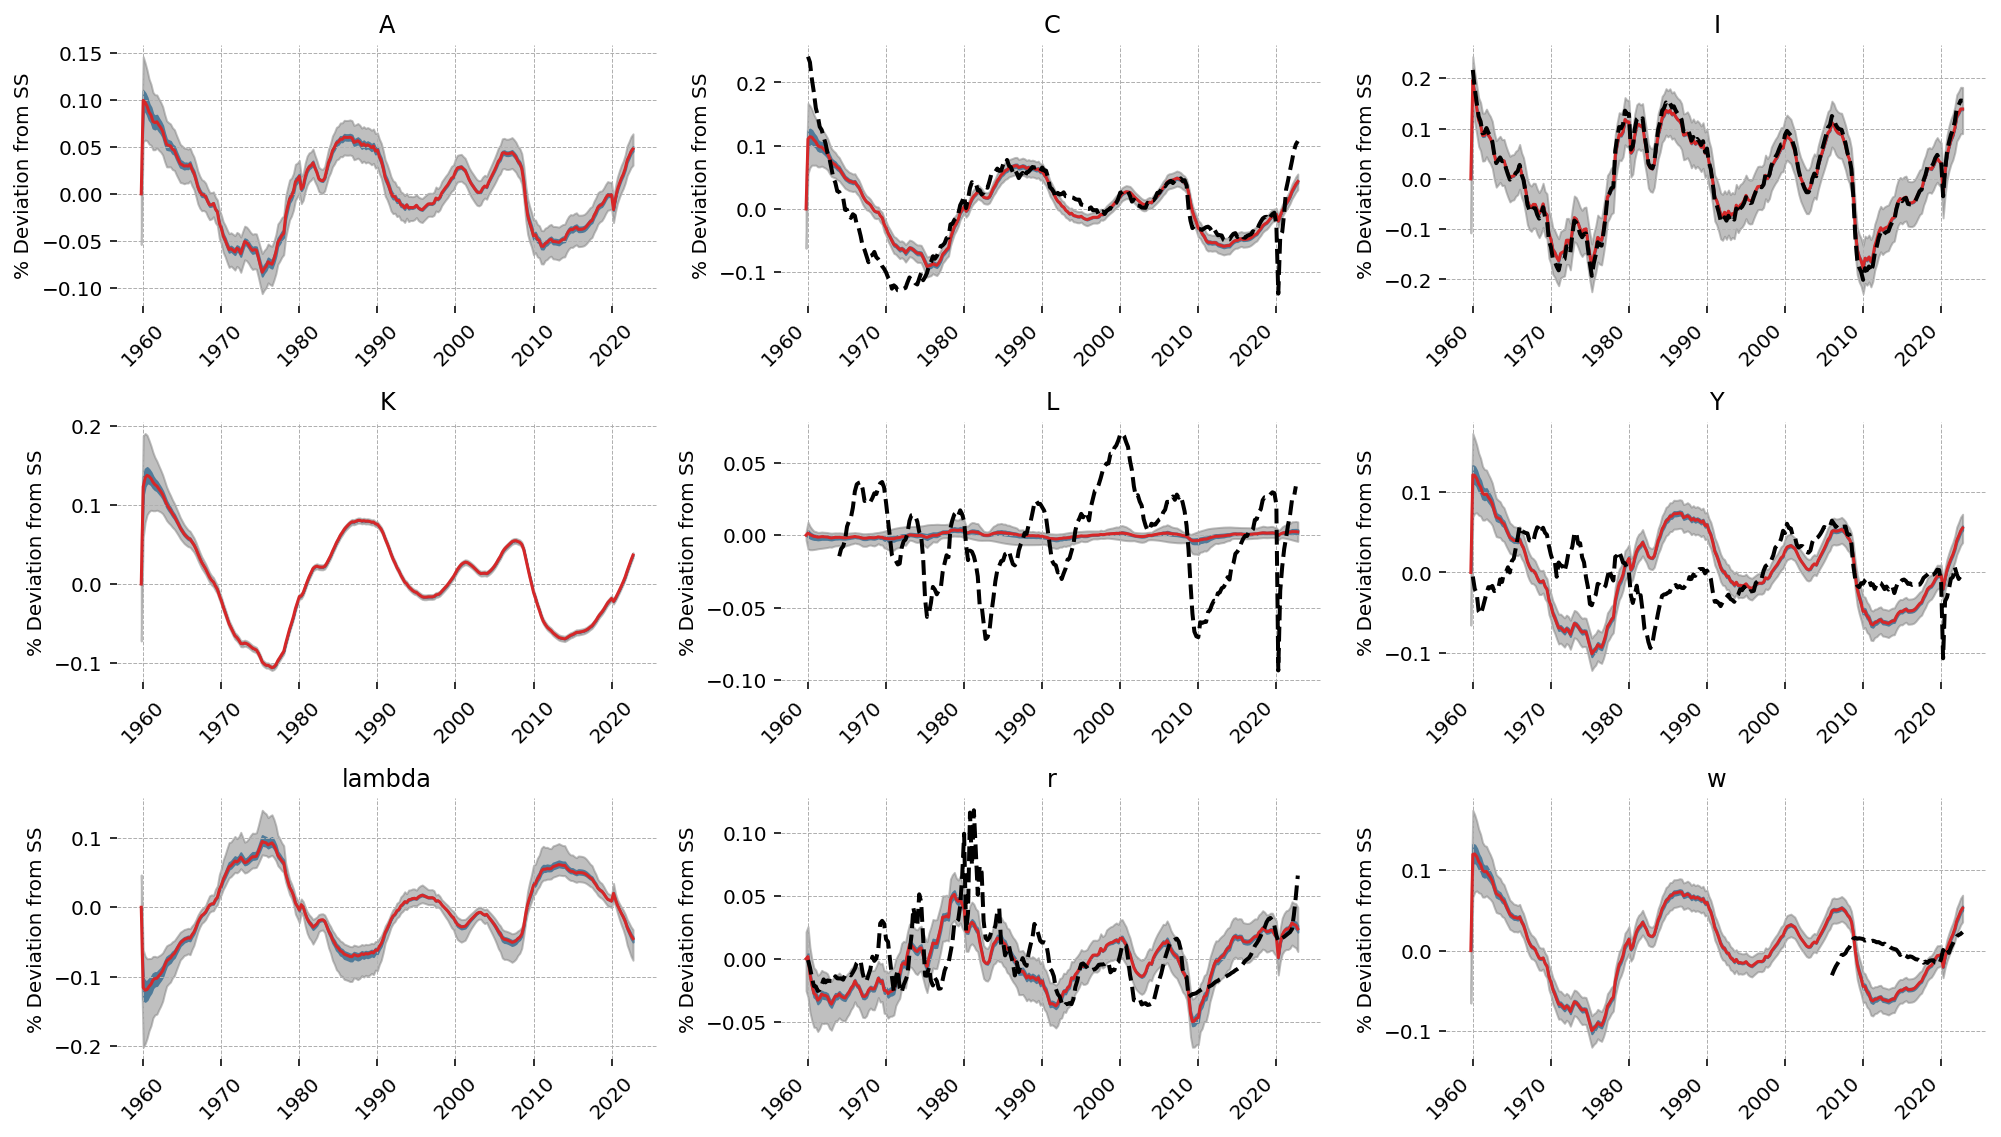

In [39]:
gp.plot_kalman_filter(
    conditional_posterior, df_detrend, "predicted", n_cols=3, figsize=(14, 8)
);

### Kalman Smoother Output

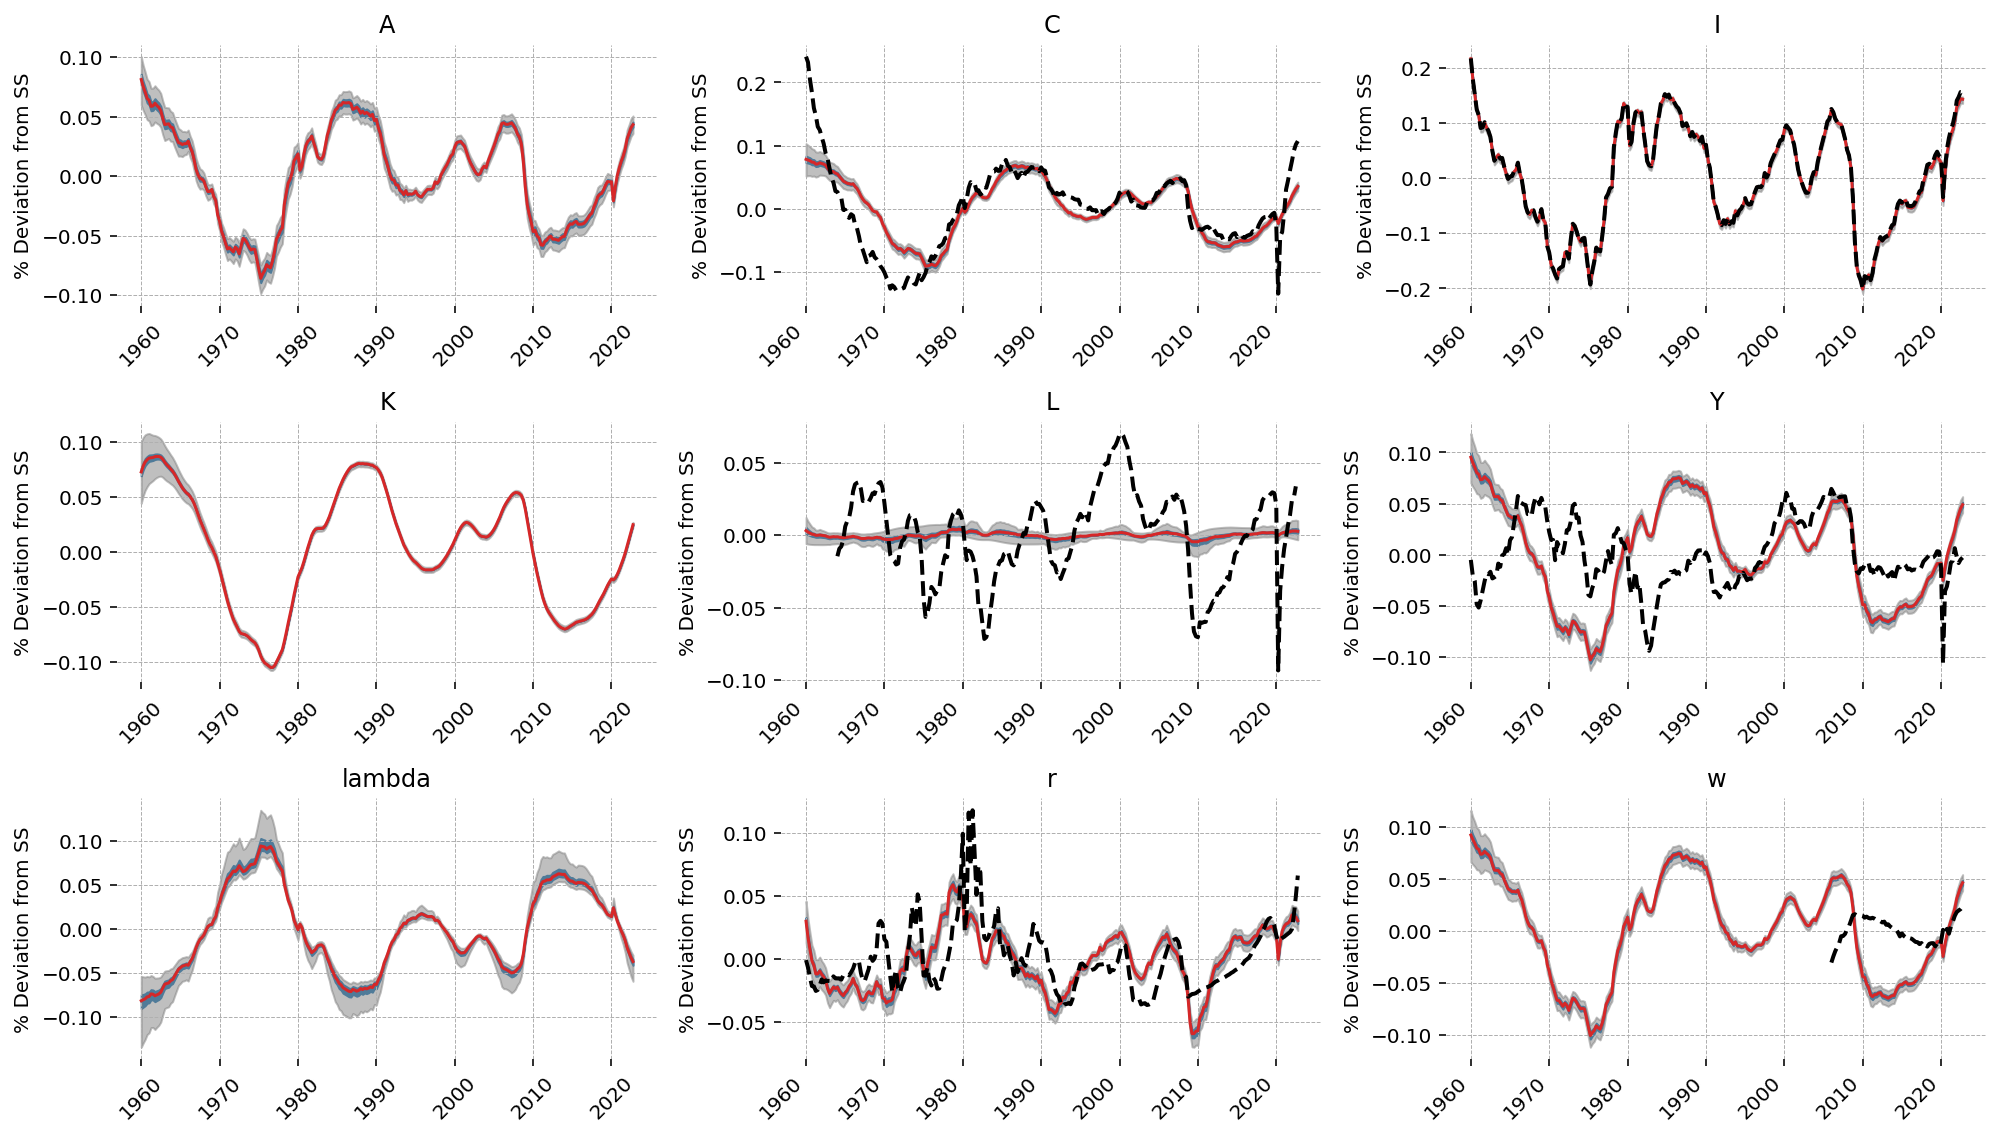

In [40]:
gp.plot_kalman_filter(
    conditional_posterior, df_detrend, "smoothed", n_cols=3, figsize=(14, 8)
);